<IPython.core.display.Javascript object>


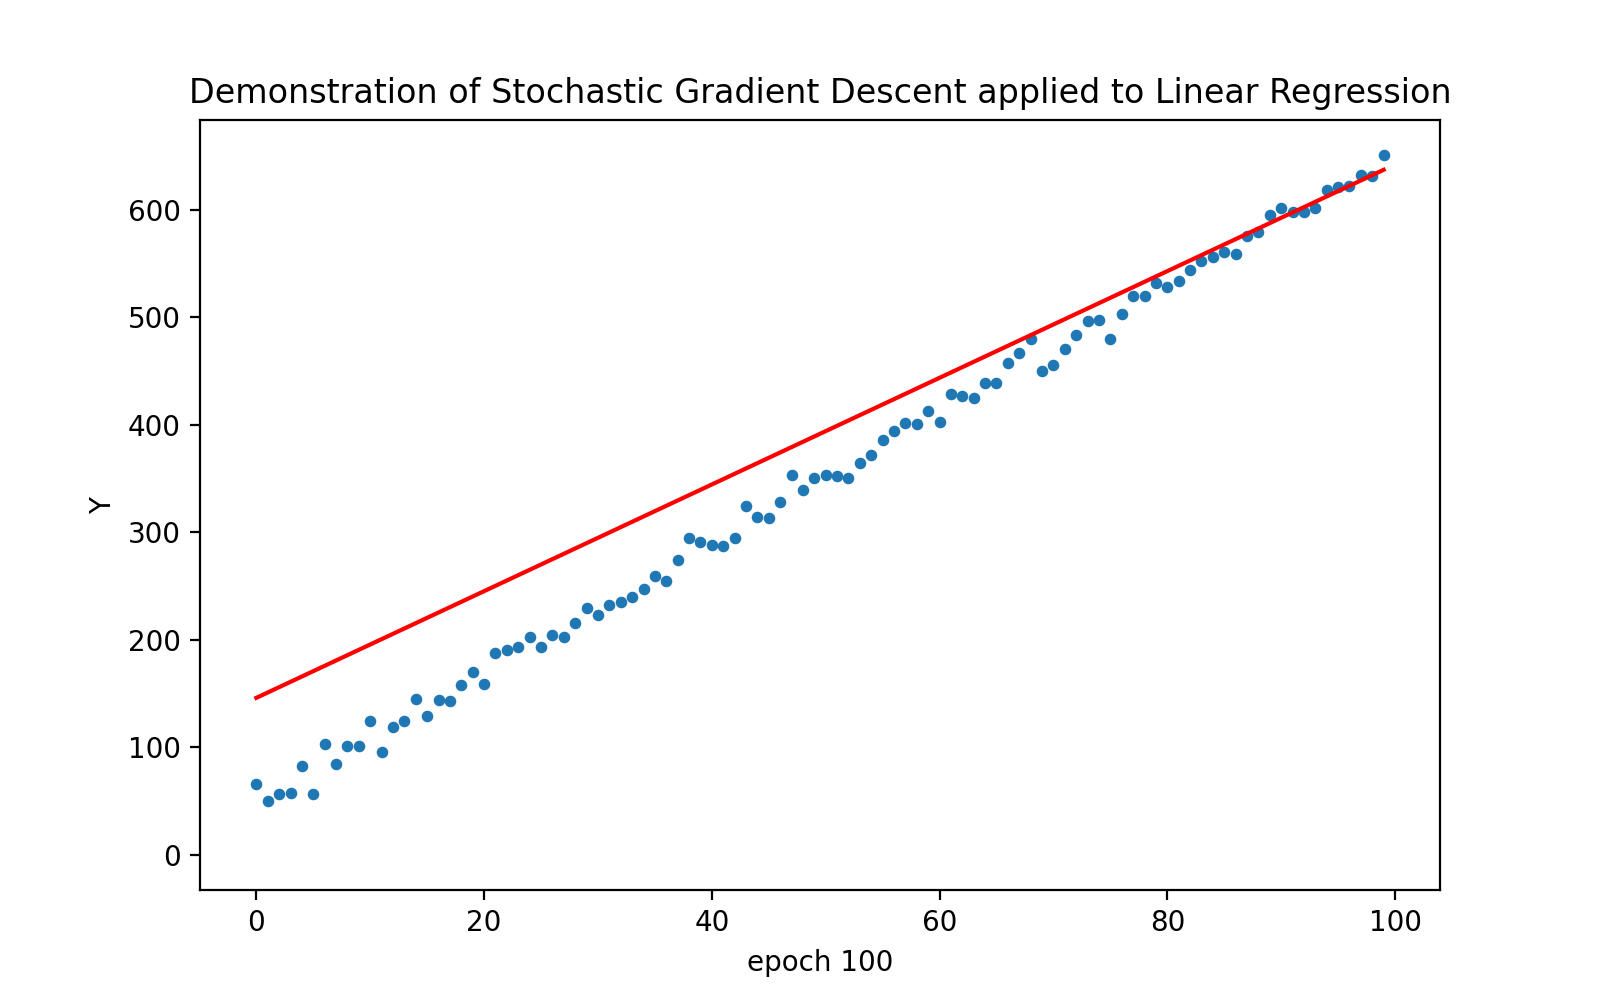

<IPython.core.display.Javascript object>


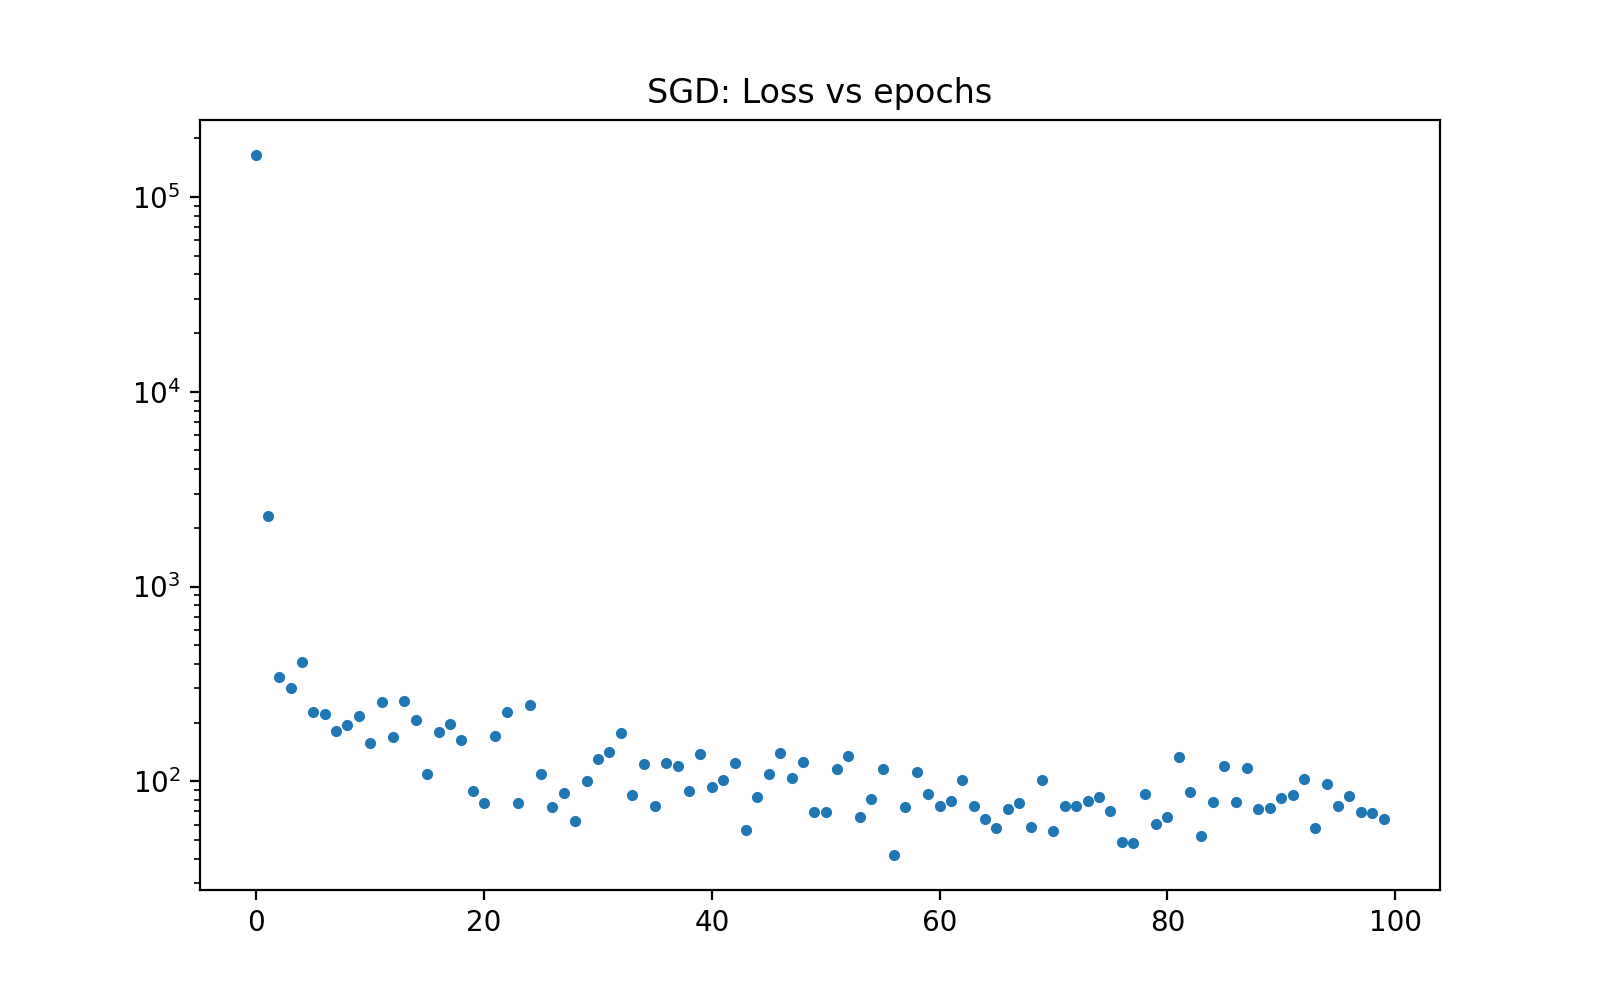

Final Loss=6.388820e+01, m=6.0632217874855705, c=49.22897920765728


<IPython.core.display.Javascript object>


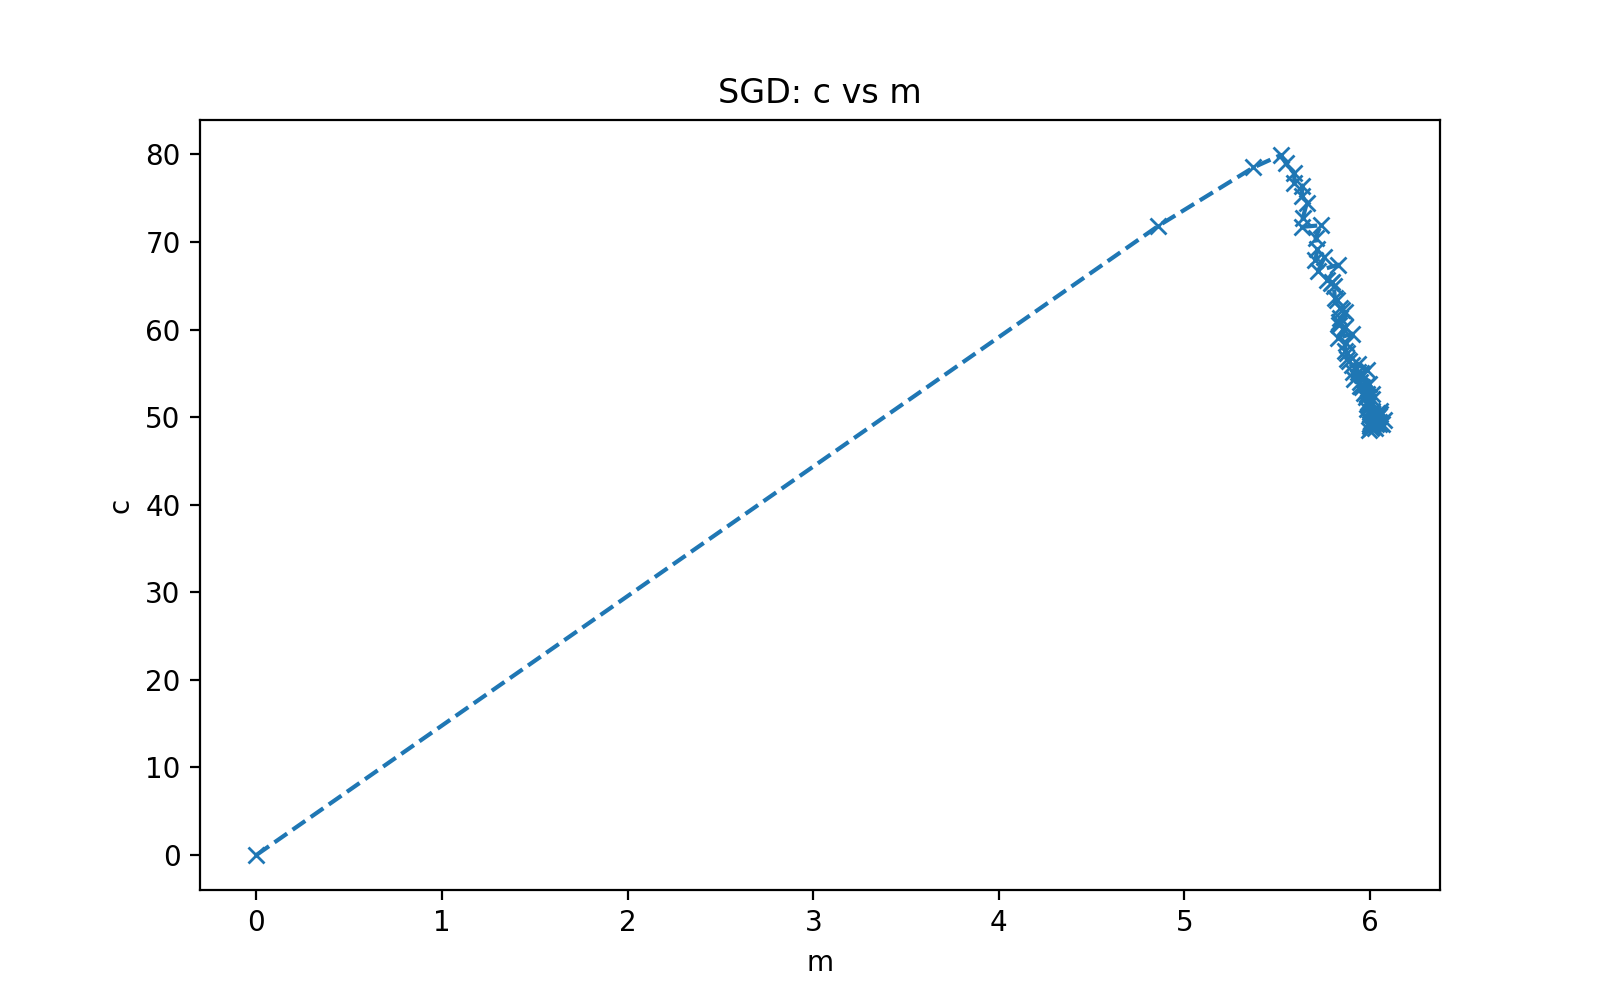

In [66]:
#https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
# with Stochastic GD

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import time
import random

from numpy.random import seed
from numpy.random import randn
# seed random number generator
seed(1)

N=100  # Number of datapoints
L=1e-4  # learning rate for parameter m
Lc=1e-1 # learning rat for parameter c
epochs = 100  # The number of iterations to perform stochastic gradient descent
TS = 0.1  # Time delay between each iteration

Loss = np.zeros(epochs)

# create the X, Y data:
Y_1 = 10  # coefficient for Y0 below
Y_m = 6   # slope for generating data
Y_c = 50 # c-value 

Y0 = randn(N) # initial gaussian random distribution
X = np.array([i for i in range(0,N)])
Y = Y_1 * Y0 + Y_m * X + Y_c




m0 = 0.0  #Guess an initial value for slope of line Y = m*x + c
c0 = 0.0  #Guess initial value for c

ma = np.zeros(epochs)
ca = np.zeros(epochs)


plt.rcParams["figure.figsize"] = (8, 5)

plt.ion()  # interactive plot ON


fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(X, Y, s=10)

# Building the model
m = m0
c = c0

Loss = np.zeros(epochs)
n = float(len(X)) # Number of elements in X
#print(f"n=",n)

# Performing Stochastic Gradient Descent 
Y_pred = m*X + c  # The current predicted value of Y

X1 = [min(X),max(X)]
Y1 = [min(Y_pred), max(Y_pred)]
line, = ax.plot(X1, Y1, color='red')  # regression line
ax.set_ylabel("Y")

ax.set_title("Demonstration of Stochastic Gradient Descent applied to Linear Regression")


combined_list = list(zip(X,Y));

for i in range(epochs): 
    ma[i]=m
    ca[i]=c
    
    # stocastic changes part 
    
    batch_size = int(n/5)
    
    selected_combined = random.sample(combined_list, batch_size)
    
    selected_X, selected_Y = zip(*selected_combined)
    
    selected_X = np.asarray(selected_X)
    selected_Y = np.asarray(selected_Y)
    
    Y_pred = m*selected_X + c  # The current predicted value of Y
    
    Loss[i] = (1/batch_size) * sum(pow((selected_Y - Y_pred),2))
    D_m = (-2/batch_size) * sum(selected_X * (selected_Y - Y_pred))  # Derivative wrt m
    D_c = (-2/batch_size) * sum(selected_Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - Lc * D_c  # Update c

    Y2 = [min(Y_pred), max(Y_pred)]
    line.set_ydata(Y2)
    label = 'epoch {0}'.format(i + 1)
    ax.set_xlabel(label)
    fig.canvas.draw()
    fig.canvas.flush_events()

    time.sleep(TS)

fig = plt.figure(2)
plt.title("SGD: Loss vs epochs")
plt.yscale("log")
plt.plot(Loss,'.',linestyle = 'None')
print(f"Final Loss={Loss[epochs-1]:e}, m={m}, c={c}")

fig = plt.figure(5)
plt.title("SGD: c vs m")
plt.xlabel("m")
plt.ylabel("c")
plt.plot(ma,ca,'x',linestyle='dashed')

plt.show()
